In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## load the dataset
dataset = pd.read_csv('/content/drive/My Drive/BA 476 Final/stroke.csv')

dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
dataset.shape
# total rows: 5110 and columns: 12

(5110, 12)

## **EXPLORATORY DATA ANALYSIS**

In [4]:
dataset.info()
#bmi has null values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dataset = dataset.dropna()

In [6]:
dataset = dataset[dataset['smoking_status'] != 'Unknown']
dataset = dataset.drop(columns = ['id'])

dataset
#no null values!

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [7]:
## updated number after deleting null values and unknown smoking status
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3426 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3426 non-null   object 
 1   age                3426 non-null   float64
 2   hypertension       3426 non-null   int64  
 3   heart_disease      3426 non-null   int64  
 4   ever_married       3426 non-null   object 
 5   work_type          3426 non-null   object 
 6   Residence_type     3426 non-null   object 
 7   avg_glucose_level  3426 non-null   float64
 8   bmi                3426 non-null   float64
 9   smoking_status     3426 non-null   object 
 10  stroke             3426 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 321.2+ KB


In [8]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,48.645943,0.119089,0.060128,108.321891,30.290047,0.052539
std,18.851239,0.323941,0.237759,47.703541,7.295958,0.223145
min,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,34.000000,0.000000,0.000000,77.237500,25.300000,0.000000
50%,50.000000,0.000000,0.000000,92.360000,29.100000,0.000000
75%,63.000000,0.000000,0.000000,116.207500,34.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


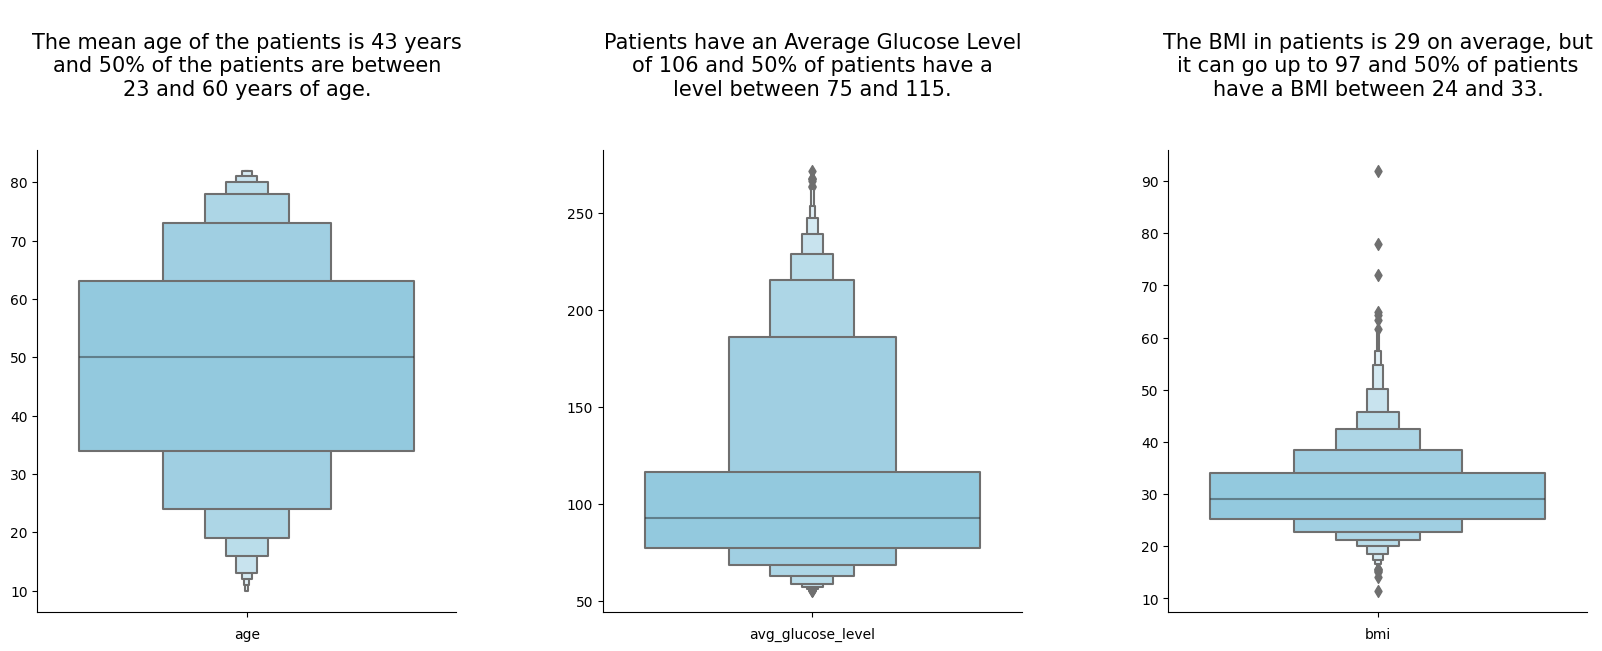

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Numerical Features.
features_num = dataset.select_dtypes(include='float64').columns

# Plot Description.
description = [
    str(f'\nThe mean age of the patients is 43 years\nand 50% of the patients are between\n23 and 60 years of age.\n\n'),
    str(f'Patients have an Average Glucose Level\nof 106 and 50% of patients have a\nlevel between 75 and 115.\n\n'),
    str(f'The BMI in patients is 29 on average, but\nit can go up to 97 and 50% of patients\nhave a BMI between 24 and 33.\n\n')
]

# Grid Plot.
fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.35)

# Custom palette definition.
 # Example palette, replace it with your desired palette.
palette = ["skyblue"]  # Adding another color to the palette.

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(features_num.values):
    ax = plt.subplot(gs[i])
    sns.boxenplot(y=dataset[j], palette=palette, ax=ax)
    ax.set_title(description[i], fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(str(j))
    ax.set_ylabel('')

plt.show()



In [9]:
## stroke: percents

print(dataset['stroke'].value_counts(normalize=True)*100)

0    94.74606
1     5.25394
Name: stroke, dtype: float64


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_correlated_features' contains the top correlated features obtained earlier
import pandas as pd

# Assuming 'dataset' is your dataframe and 'target_var' is your target variable
# Replace 'target_var' with your actual target variable name

# Calculate the correlation matrix with respect to the target variable
correlation_matrix = dataset.corr().abs()[['stroke']]

# Get the top 5 features most correlated with the target variable
top_correlated_features = correlation_matrix.sort_values(by='stroke', ascending=False).head(6)[1:]  # Excluding the target variable itself

print("Top 5 most correlated features with the target variable:")
print(top_correlated_features)


Top 5 most correlated features with the target variable:
                     stroke
age                0.242495
hypertension       0.143647
avg_glucose_level  0.140453
heart_disease      0.138553
bmi                0.011673


<ipython-input-114-2aca540251ee>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().abs()[['stroke']]


In [10]:
import seaborn as sn

#sn.pairplot(dataset, hue="stroke")

In [11]:
from tabulate import tabulate
age_counts = dataset.groupby('stroke')['age'].mean().round().reset_index()
# age_counts

table = tabulate(age_counts, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+--------+------+
| stroke | age  |
+--------+------+
|  0.0   | 48.0 |
|  1.0   | 68.0 |
+--------+------+


In [12]:
gender_counts = dataset.groupby('stroke')['gender'].value_counts()
gender_counts

stroke  gender
0       Female    1981
        Male      1264
        Other        1
1       Female     105
        Male        75
Name: gender, dtype: int64

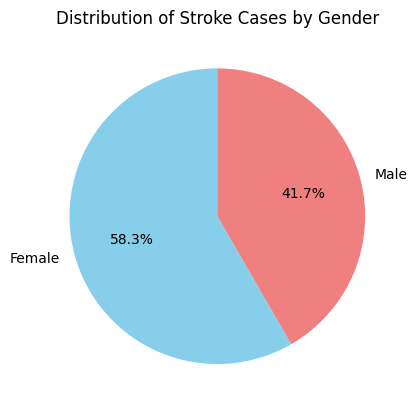

In [84]:
# gender based % of strokes

female = dataset[(dataset['gender'] == 'Female') & (dataset['stroke'] == 1)]
male = dataset[(dataset['gender'] == 'Male') & (dataset['stroke'] == 1)]

female_counts = len(female)/180

male_counts = len(male)/180

labels = ['Female', 'Male']
sizes = [female_counts, male_counts]

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Stroke Cases by Gender')
plt.show()

In [85]:
import matplotlib.pyplot as plt
import pandas as pd


# Filter data for females and males with strokes
female_stroke = dataset[(dataset['gender'] == 'Female') & (dataset['stroke'] == 1)]
male_stroke = dataset[(dataset['gender'] == 'Male') & (dataset['stroke'] == 1)]

# Calculate average age for females and males with strokes
average_age_female_stroke = female_stroke['age'].mean()
average_age_male_stroke = male_stroke['age'].mean()

# Display the average ages
print(f"Average Age of Females with Stroke: {average_age_female_stroke:.2f}")
print(f"Average Age of Males with Stroke: {average_age_male_stroke:.2f}")


Average Age of Females with Stroke: 67.48
Average Age of Males with Stroke: 68.87


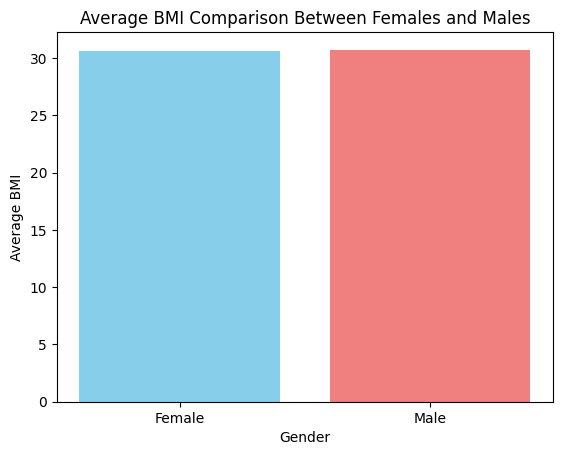

In [86]:
## average bmi of female and male and stroke likelihood

average_f_bmi = female['bmi'].mean()
average_m_bmi = male['bmi'].mean()

# Plotting the bar graph
plt.bar(['Female', 'Male'], [average_f_bmi, average_m_bmi], color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Average BMI')
plt.title('Average BMI Comparison Between Females and Males')
plt.show()

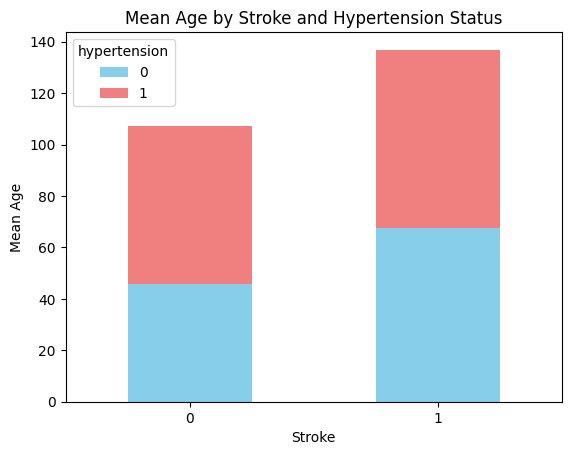

In [87]:

### hypertension, age and stroke relationship
stroke_age_hyper = dataset.groupby(['stroke', 'hypertension'])['age'].mean()
stroke_age_hyper


# Unstacking the result to create a DataFrame suitable for plotting
stroke_age_hyper = stroke_age_hyper.unstack()

# Plotting the bar graph
ax = stroke_age_hyper.plot(kind='bar', stacked=True, rot=0, color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Stroke')
plt.ylabel('Mean Age')
plt.title('Mean Age by Stroke and Hypertension Status')

# Show the plot
plt.show()

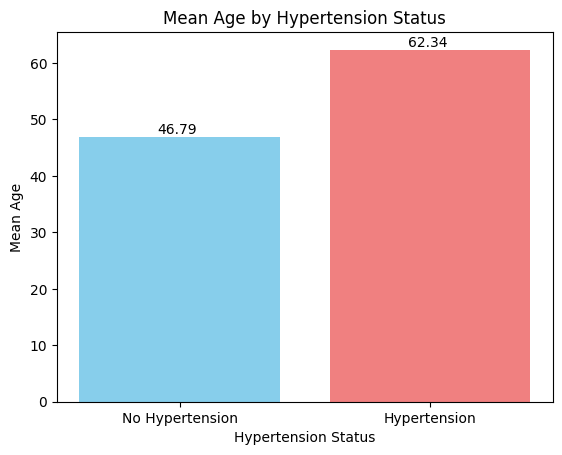

In [88]:
## hypertension and age relationship
hyper_age = dataset.groupby('hypertension')['age'].mean()
hyper_age

categories = [0, 1]

# Plotting the bar graph
bars = plt.bar(categories, hyper_age.values,color=['skyblue', 'lightcoral'] )

# Adding labels and title
plt.xlabel('Hypertension Status')
plt.ylabel('Mean Age')
plt.title('Mean Age by Hypertension Status')

for bar, label in zip(bars, hyper_age.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.01, bar.get_height() + 0.05, f'{label:.2f}', ha='center', va='bottom')

plt.xticks(categories, ['No Hypertension', 'Hypertension'])

plt.show()

<Axes: xlabel='gender', ylabel='count'>

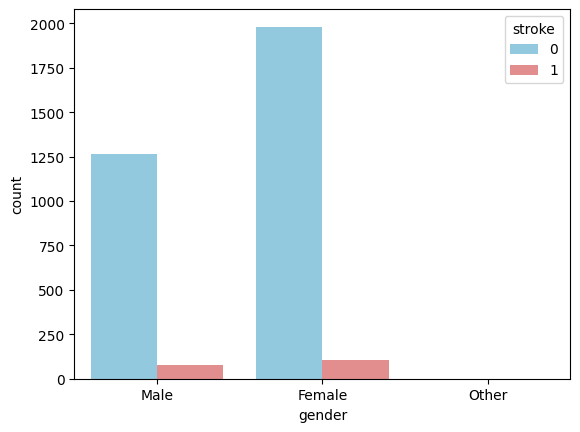

<Axes: xlabel='ever_married', ylabel='count'>

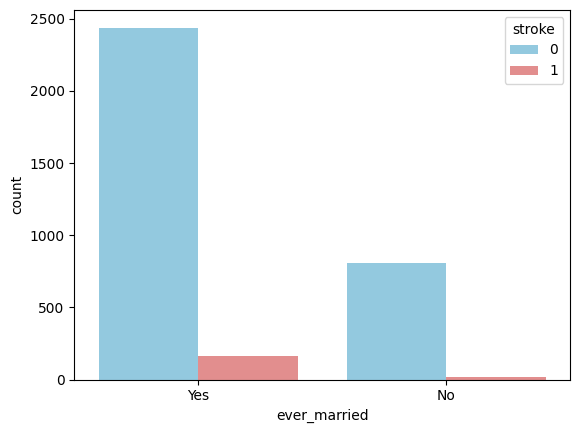

In [90]:
custom_palette = ['skyblue', 'lightcoral']

# Plotting count of strokes based on gender with custom colors
sns.countplot(x="ever_married", hue="stroke", data=dataset, palette=custom_palette)


<Axes: xlabel='work_type', ylabel='count'>

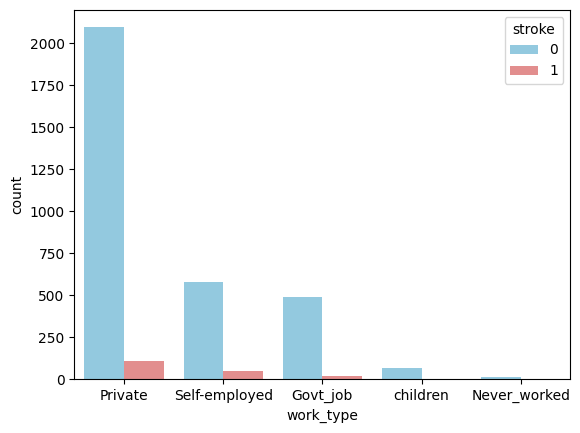

In [80]:
custom_palette = ['skyblue', 'lightcoral']

# Plotting count of strokes based on gender with custom colors
sns.countplot(x="work_type", hue="stroke", data=dataset, palette=custom_palette)


<Axes: xlabel='Residence_type', ylabel='count'>

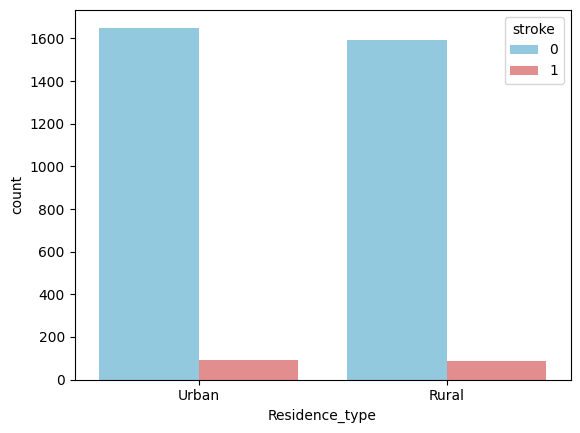

In [78]:
custom_palette = ['skyblue', 'lightcoral']

# Plotting count of strokes based on gender with custom colors
sns.countplot(x="Residence_type", hue="stroke", data=dataset, palette=custom_palette)


In [91]:
## feature 1: add numeric rep of smoking
## 0: never smoked, 1: smokes 2: formerly smoked


# Add a new column 'smoked' based on conditions
#dataset['smoked'] = np.select(conditions, values, default=2)

dataset
### OHE on categorical values

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [19]:
# non_smoke = len(dataset[(dataset['smoked'] == 0) & (dataset['stroke'] == 1)])
# smoke = len(dataset[(dataset['smoked'] == 1) & (dataset['stroke'] == 1)])
# former_smoke = len(dataset[(dataset['smoked'] == 2) & (dataset['stroke'] == 1)])


# data = [non_smoke, smoke, former_smoke]
# labels = ['Does NOT smoke', 'Smoke', 'Formerly Smoked']


# plt.pie(data, labels=labels, autopct='%1.1f%%', colors = ['skyblue', 'lightcoral', 'turquoise'])
# plt.title('Distribution of Stroke Cases by Smoking Status')
# plt.show()

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV

## first, make a copy of the dataset --> easier to modify!
### then, split the dataset into train and test

stroke_data = dataset.copy()
#stroke_data


X = stroke_data.loc[:, ~stroke_data.columns.isin(["stroke"])] #id is dropped!!!
y = stroke_data.loc[:, "stroke"]

X.shape, y.shape

((3426, 10), (3426,))

In [31]:
# 'stratfiy can prevent overfitting, but only one target variable'
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42) #random_state allows same random split to be selected on each run

In [32]:
#check 80, 20 split

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2740, 10), (686, 10), (2740,), (686,))

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


SCALE THE CATEGORICAL VARIABLES

In [44]:
#Scaling
numeric_features = X_train.select_dtypes(include=[float, int]).columns
# numeric_features
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numeric_features])

# Transform the training and testing data using the fitted scaler
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


# OHE --> necessary since categorical variables represent strings
X_train_encoded = pd.get_dummies(X_train, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first = True)
X_test_encoded = pd.get_dummies(X_test, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first = True)

X_train_encoded.shape

(2740, 14)

In [51]:
X_test_encoded = X_test_encoded.drop(columns = ['gender_Other'])

In [52]:
X_test_encoded.shape

(686, 14)

<Axes: >

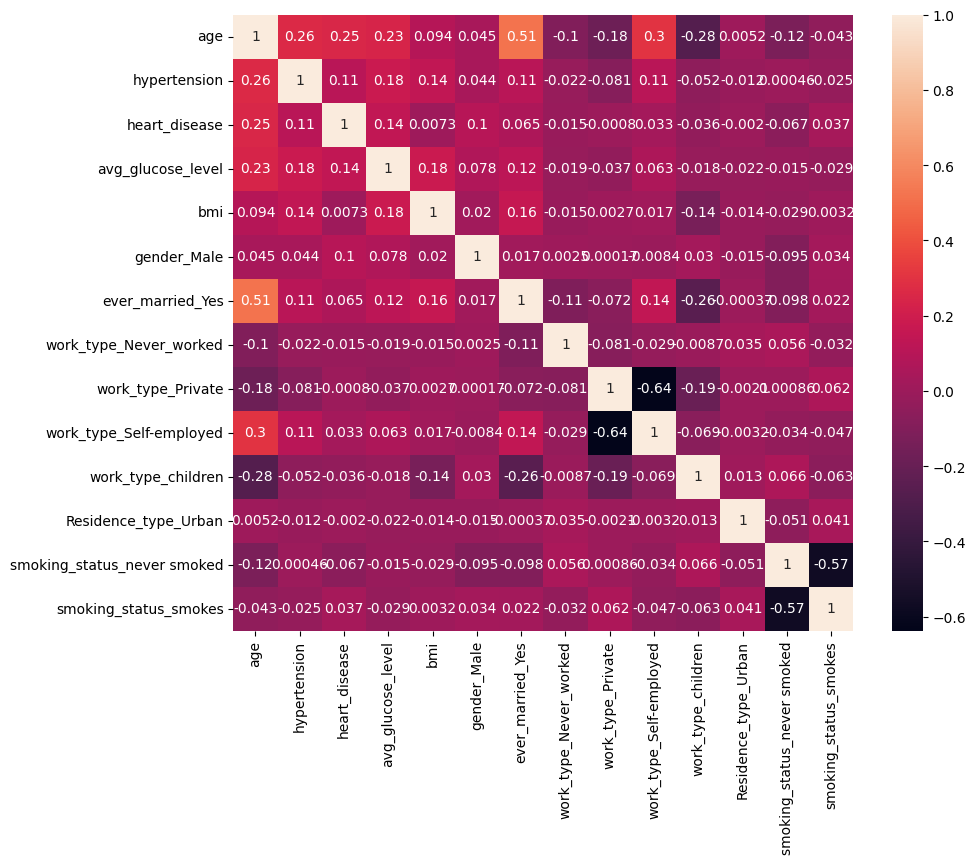

In [92]:
#Plotting the heat map for correlation
plt.figure(figsize=(10,8))
sn.heatmap(X_train_encoded.corr(),annot=True)

In [117]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

def gridSearch(X_train_encoded, y_train):
    params = {
        "Linear Regression": {
            "model": LinearRegression(),
            "param": {}
        },
        "Lasso Regression": {
            "model": Lasso(),
            "param": {
                "alpha": [0.01, 0.05, 0.1, 0.5, 1, 2],
            }
        },
        "Ridge Regression": {
            "model": Ridge(),
            "param": {
                 "alpha": [0.001, 0.05, 0.1, 0.5, 1, 2],
            }
        },
        "Elastic Net": {
            "model": ElasticNet(),
            "param": {
                "alpha": [0.01, 0.05, 0.1, 0.5, 1, 2],
                "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
            }
        },
        "Decision Tree Regressor": {
            "model": DecisionTreeRegressor(),
            "param": {
                "max_depth": list(range(5, 25)),
                "max_features": ["sqrt", "log2"],
                "criterion": ['squared_error'],
                "splitter": ["best", "random"]
            }
        },
        "Random Forest": {
            "model": RandomForestRegressor(),
            "param": {
                "n_estimators": [50, 100, 500, 1000, 5000],
                "criterion": ["squared_error"]
            }
        },
        "Gradient Boosting Regressor": {
            "model": GradientBoostingRegressor(),
            "param": {
                "learning_rate": [0.1, 0.01, 0.001],
                "n_estimators": [10, 100, 200]
            }
        },
        "KNN": {
            "model": KNeighborsRegressor(),
            "param": {
                "n_neighbors": [3, 5, 10, 15, 20],
                "weights": ["uniform", "distance"],
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                "leaf_size": [5, 10, 30, 50, 100]
            }
        }
    }

    scores = []
    for model_name, mp in params.items():
        gsc = GridSearchCV(mp["model"], mp["param"], cv=5).fit(X_train_encoded, y_train)
        best_params = gsc.best_params_

        best_model = mp["model"].set_params(**best_params)
        best_model.fit(X_train_encoded, y_train)

        y_pred = best_model.predict(X_test_encoded)

        mse = mean_squared_error(y_test, y_pred)
        scores.append({
            "model": model_name,
            "best_params": best_params,
            "mse": mse
        })

    return pd.DataFrame(scores, columns=["model", "best_params", "mse"])
# Assuming you have X_train_encoded and y_train defined

In [118]:
scores = gridSearch(X_train_encoded, y_train)

In [119]:
scores

,model,best_params,mse
0,Linear Regression,{},0.055051
1,Lasso Regression,{'alpha': 0.01},0.055656
2,Ridge Regression,{'alpha': 2},0.055046
3,Elastic Net,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.054894
4,Decision Tree Regressor,"{'criterion': 'squared_error', 'max_depth': 5,...",0.061587
5,Random Forest,"{'criterion': 'squared_error', 'n_estimators':...",0.061686
6,Gradient Boosting Regressor,"{'learning_rate': 0.01, 'n_estimators': 100}",0.057199
7,KNN,"{'algorithm': 'auto', 'leaf_size': 5, 'n_neigh...",0.057544


In [98]:
### Linear Regression#####
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you've already defined and split your data into X_train_encoded, X_test_encoded, y_train, y_test

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_encoded)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

# Print the Mean Squared Error
print("Linear Regression:", mse)

Linear Regression: 0.05505065101874409


In [99]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

model = Lasso( alpha = 0.01)

model.fit(X_train_encoded, y_train)

predictions= model.predict(X_test_encoded)

mse = mean_squared_error(y_test, predictions)

print("Lasso Regression:", mse)

Lasso Regression: 0.0556560561544785


In [100]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge(alpha = 2)

model.fit(X_train_encoded, y_train)

predictions= model.predict(X_test_encoded)

mse = mean_squared_error(y_test, predictions)

print("Ridge Regression:", mse)

Ridge Regression: 0.05504646722826019


In [101]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

model = ElasticNet(alpha= 0.01, l1_ratio= 0.1)

model.fit(X_train_encoded, y_train)

predictions= model.predict(X_test_encoded)

mse = mean_squared_error(y_test, predictions)

print("Elastic Nets:", mse)

Elastic Nets: 0.05489392735030818


In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(criterion='squared_error', max_depth=5, max_features='sqrt', splitter='random')

model.fit(X_train_encoded, y_train)

predictions = model.predict(X_test_encoded)

mse = mean_squared_error(y_test, predictions)

print("Decision Tree Regressor:", mse)


Decision Tree Regressor: 0.05667202770746949


In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize RandomForestRegressor with specified parameters
model = RandomForestRegressor(criterion='squared_error', n_estimators=1000)

# Fit the model to the training data
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_encoded)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

print("Random Forest Regressor:", mse)


Random Forest Regressor: 0.061827584548104955


In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize GradientBoostingRegressor with specified parameters
model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100)

# Fit the model to the training data
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_encoded)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

print("Gradient Boosting Regressor:", mse)


Gradient Boosting Regressor: 0.057200171537175215


In [105]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize KNeighborsRegressor with specified parameters
model = KNeighborsRegressor(algorithm='auto', leaf_size=5, n_neighbors=20, weights='uniform')

# Fit the model to the training data
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_encoded)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

print("KNeighbors Regressor:", mse)


KNeighbors Regressor: 0.05754373177842565


In [106]:
# Assuming best_params_df is the DataFrame containing model names, their best parameters, and MSE results
best_params_df = scores # Your DataFrame with the information you provided

# Assuming you have the test dataset X_test defined

# Initialize models with their best parameters
best_models = []

# Loop through each row in the DataFrame to recreate models with best parameters
for index, row in best_params_df.iterrows():
    model_name = row['model']
    best_params = row['best_params']
    #print(best_params)

    # Recreate the models with best parameters and store them in best_models list
    if model_name == 'Linear Regression':
        model = LinearRegression(**best_params)
    elif model_name == 'Lasso Regression':
        model = Lasso(**best_params)
    elif model_name == 'Ridge Regression':
        model = Ridge(**best_params)

    elif model_name == 'Elastic Net':
      model = ElasticNet(**best_params)

    elif model_name == 'Decision Tree Regressor':
       model = DecisionTreeRegressor(**best_params)

    elif model_name == "Random Forest":
      model = RandomForestRegressor(**best_params)

    elif model_name == "Gradient Boosting Regressor":
      model = GradientBoostingRegressor(**best_params)

    elif model_name == "KNN":
      model = KNeighborsRegressor(**best_params)


    # Fit each model with training data before appending to the list
    model.fit(X_train_encoded, y_train)
    best_models.append(model)

# Predict using each model on the test set X_test
for model in best_models:
    predictions = model.predict(X_test_encoded)
    # Calculate MSE for each model on the test set
    mse = mean_squared_error(y_test, predictions)
    print(f"Model: {model.__class__.__name__}, MSE on Test Set: {mse}")

Model: LinearRegression, MSE on Test Set: 0.05505065101874409
Model: Lasso, MSE on Test Set: 0.0556560561544785
Model: Ridge, MSE on Test Set: 0.05504646722826019
Model: ElasticNet, MSE on Test Set: 0.05489392735030818
Model: DecisionTreeRegressor, MSE on Test Set: 0.058373643560724275
Model: RandomForestRegressor, MSE on Test Set: 0.06152918804664723
Model: GradientBoostingRegressor, MSE on Test Set: 0.0572044868497044
Model: KNeighborsRegressor, MSE on Test Set: 0.05754373177842565


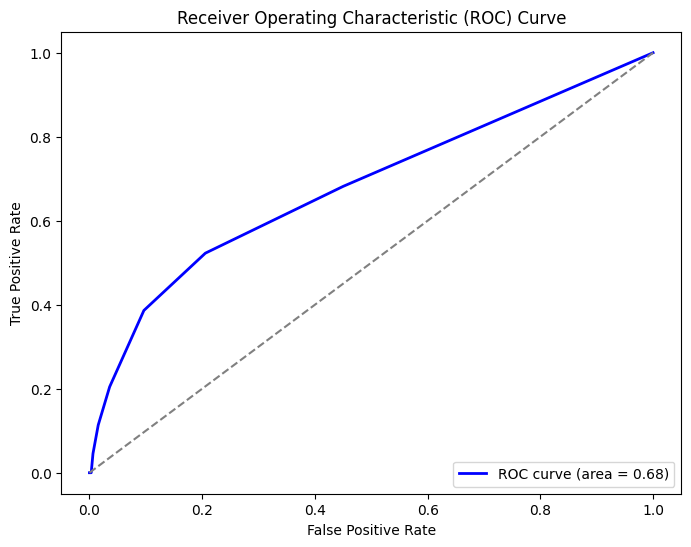

In [127]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and its AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
